In [1]:
# cargar los datos desde el archivo csv.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
titanic_csv = pd.read_csv(r'C:\Users\Florencia\Documents\04 Data Science\01 Modulo 01\04 Pandas\Titanic.csv')

In [19]:
titanic_csv.shape

(891, 12)

In [4]:
titanic_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# cantidad de pasajeros => 891
titanic_csv.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Pasanger Id es redundante para el DF porque se reemplaza por index en DF
# Survided es relevante => Esta completo
# Pclass es relevante para analizar las causas de los sobrevivientes = Esta completo 1st 2nd 3rd and is a proxy for socio-economic class
# Name
# Sex
# Age es relevante pero no esta completo
# SibSp - Number of Siblings/Spouses Aboard parch => completo
# Parch - Number of Parents/Children Aboard => completo
# Ticket => completo 
# Fare => completo
# Cabin => incompleto es relevante pero no determinante a analizar
# Embarked =>  Three possible options S Sothhampton - C Chebourg  -Q  Queenstown 

In [20]:
# Todas las columnas son informativas o borrarias alguna?
# PassangerID es redundante 
titanic_csv.drop(['PassengerId'],axis=1,inplace=True)

In [21]:
print('TRAIN')
titanic_csv.info()
print('_'*40)

TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
________________________________________


In [24]:
titanic_csv.iloc[titanic_csv.Age.isna().idxmax()] # Age es la columna con mayor cantidad de faltantes y el registro #5 es el que mas 
# datos faltantes de la tabla tiene

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 5, dtype: object

In [25]:
print(titanic_csv.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [4]:
# cual era la persona de mayor edad???
titanic_csv.loc[titanic_csv.Age.idxmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

In [5]:
titanic_csv.loc[titanic_csv.Age.idxmax()]['Name']

'Barkworth, Mr. Algernon Henry Wilson'

In [6]:
# cual es la persona mas joven?
titanic_csv.loc[titanic_csv.Age.idxmin()]['Name']

'Thomas, Master. Assad Alexander'

In [10]:
# cual es la edad?
print(titanic_csv.loc[titanic_csv.Age.idxmin()]['Name'])
print(titanic_csv.loc[titanic_csv.Age.idxmin()]['Age'], "anios" )

Thomas, Master. Assad Alexander
0.42 anios


In [15]:
titanic_csv_copia = titanic_csv.copy()
titanic_csv_copia.shape

(891, 12)

In [16]:
# Descartar filas que tengan un valor faltante
titanic_csv_copia = titanic_csv.copy()
titanic_csv_copia.dropna(axis=0, inplace=True)
titanic_csv_copia.shape

(183, 12)

In [17]:
titanic_csv_copia = titanic_csv.copy()
titanic_csv_copia.shape

(891, 12)

In [18]:
# Descartar colunmas que tengan un valor faltante
titanic_csv_copia.dropna(axis=1, inplace=True)
titanic_csv_copia.shape

(891, 9)

In [19]:
titanic_csv_copia.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [21]:
# Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?
titanic_csv_copia = titanic_csv.copy()
titanic_csv_copia.dropna(axis=0,thresh=3,inplace=True)
titanic_csv_copia.shape

(891, 12)

In [25]:
# Descartar colunmas que tengan mas del 50% de los valores faltantes 
titanic_csv_copia.dropna(axis=1,thresh = titanic_csv_copia.shape[0]*0.5,inplace=True)
titanic_csv_copia.shape

(891, 11)

In [26]:
titanic_csv_copia.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
# Imputacion de Valores

print(titanic_csv_copia.Age.mean())
print(titanic_csv_copia.Age.median())
print(titanic_csv_copia.Age.mode())
print(titanic_csv_copia.Age.std())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64
14.526497332334042


In [29]:
titanic_csv_copia.fillna(titanic_csv_copia.Age.median(),inplace=True)
titanic_csv_copia.shape

(891, 11)

In [30]:
print(titanic_csv_copia.Age.mean())
print(titanic_csv_copia.Age.median())
print(titanic_csv_copia.Age.mode())
print(titanic_csv_copia.Age.std())

29.36158249158249
28.0
0    28.0
Name: Age, dtype: float64
13.019696550973201


In [31]:
# Fill in with mean
titanic_csv_copia = titanic_csv.copy()
titanic_csv_copia.fillna(titanic_csv_copia.Age.mean(),inplace=True)
titanic_csv_copia.shape

(891, 12)

In [32]:
print(titanic_csv_copia.Age.mean())
print(titanic_csv_copia.Age.median())
print(titanic_csv_copia.Age.mode())
print(titanic_csv_copia.Age.std())

29.69911764705882
29.69911764705882
0    29.699118
Name: Age, dtype: float64
13.002015226002882


In [35]:
# Fill in with mean
titanic_csv_copia = titanic_csv.copy()
titanic_csv_copia.fillna(titanic_csv_copia.Age.mode(),inplace=True)
titanic_csv_copia.shape

(891, 12)

In [36]:
print(titanic_csv_copia.Age.mean())
print(titanic_csv_copia.Age.median())
print(titanic_csv_copia.Age.mode())
print(titanic_csv_copia.Age.std())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64
14.526497332334042


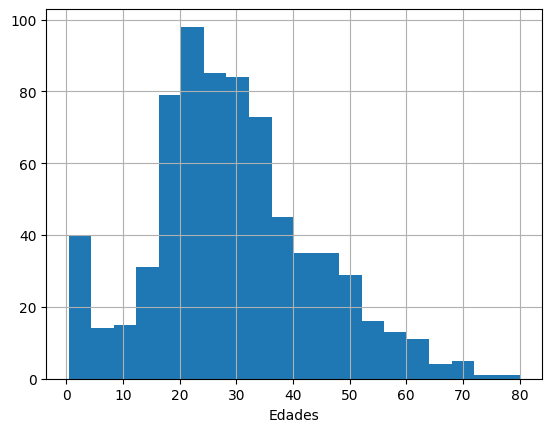

In [41]:
# Histograma de los Age
plt.hist(titanic_csv_copia.Age,bins=20)
plt.xlabel('Edades')
plt.grid()
plt.show()

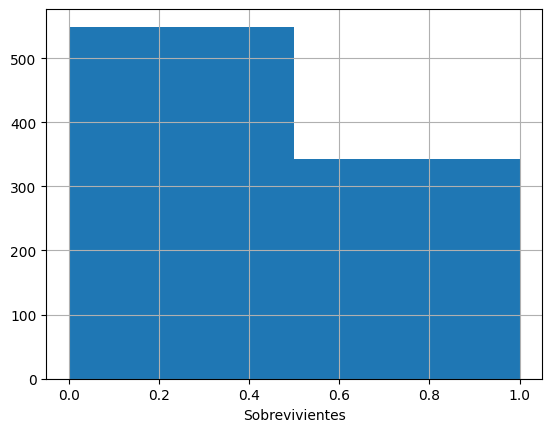

In [43]:
plt.hist(titanic_csv_copia.Survived, bins= 2,log = True)
plt.xlabel('Sobrevivientes')
plt.grid()
plt.show()

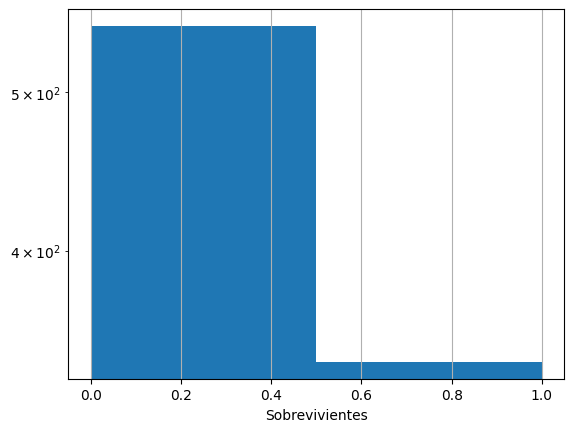

In [44]:
plt.hist(titanic_csv_copia.Survived, bins= 2,log = True)
plt.xlabel('Sobrevivientes')
plt.grid()
plt.show()

In [45]:
print(titanic_csv[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [47]:
# Tabla Dinamica
# Tomamos los registros de las columnas Pclass y Survived => titanic_csv[['Pclass','Survived']]
# y agrupamos por Pclass => groupby(['Pclass'])
# y calcula para cada grupo el promedio de personas que sobrevivio => .mean()
# y ordan la informacion para mostrarla =>  .sort_values(by='Survived', ascending=False) 
titanic_csv[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [48]:
titanic_csv[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [49]:
titanic_csv[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [50]:
titanic_csv[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [52]:
titanic_csv[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=False)

,Survived
Age,
0.42,1.0
5.00,1.0
63.00,1.0
53.00,1.0
0.67,1.0
...,...
28.50,0.0
36.50,0.0
34.50,0.0


In [60]:
titanic_csv.fillna(titanic_csv.Age.mean(), inplace = True)

In [61]:
titanic_csv['Rango_Edad'] = pd.cut(titanic_csv['Age'], 5)

In [62]:
titanic_csv[['Rango_Edad','Survived']].groupby(['Rango_Edad']).mean().sort_values(by='Survived', ascending=False)

C:\Users\Florencia\AppData\Local\Temp\ipykernel_940\2793087742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_csv[['Rango_Edad','Survived']].groupby(['Rango_Edad']).mean().sort_values(by='Survived', ascending=False)


,Survived
Rango_Edad,
"(0.34, 16.336]",0.550000
"(48.168, 64.084]",0.434783
"(32.252, 48.168]",0.404255
"(16.336, 32.252]",0.344168
"(64.084, 80.0]",0.090909


In [63]:
titanic_csv[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).mean().sort_values(by='Survived', ascending=False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [64]:
titanic_csv[['Sex','Rango_Edad','Survived']].groupby(['Sex','Rango_Edad']).mean().sort_values(by='Survived', ascending=False)

C:\Users\Florencia\AppData\Local\Temp\ipykernel_940\2553261335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_csv[['Sex','Rango_Edad','Survived']].groupby(['Sex','Rango_Edad']).mean().sort_values(by='Survived', ascending=False)


Survived
Sex    Rango_Edad                
female (48.168, 64.084]  0.916667
       (32.252, 48.168]  0.794118
       (16.336, 32.252]  0.716763
       (0.34, 16.336]    0.673469
male   (0.34, 16.336]    0.431373
       (32.252, 48.168]  0.183333
       (48.168, 64.084]  0.177778
       (16.336, 32.252]  0.160000
       (64.084, 80.0]    0.090909
female (64.084, 80.0]         NaN

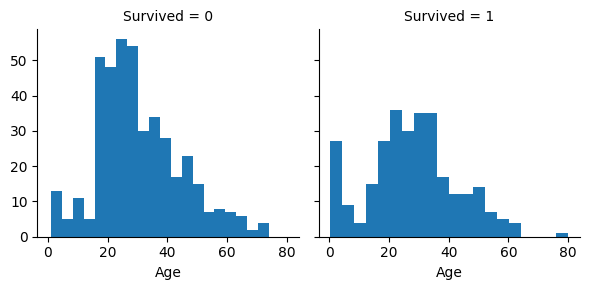

In [2]:
g = sns.FacetGrid(titanic_csv,col='Survived')
g.map(plt.hist, 'Age',bins = 20)

In [5]:
grid = sns.FacetGrid(titanic_csv,col= 'Survived', row= 'Pclass',size= 2.2, aspect= 1.6)
grid.map(plt.hist,'Age', alpha=.5,bins=20)
grid.add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'